# Álgebra II

A álgebra é um ramo da matemática que lida com símbolos e as operações aritméticas entre esses símbolos. Esses símbolos não têm valores fixos e são chamados de variáveis. Em nossos problemas da vida real, muitas vezes vemos certos valores que estão sempre mudando. Mas há uma necessidade constante de representar esses valores variáveis. Aqui na álgebra, esses valores são frequentemente representados com símbolos como $x$, $y$, $z$, $p$ ou $q$, e esses símbolos são chamados de variáveis. Além disso, esses símbolos são manipulados por meio de várias operações aritméticas de adição, subtração, multiplicação e divisão, com o objetivo de encontrar os valores.

Neste notebook continuaremos o nosso estudo sobre a álgebra, dessa vez explorando tópicos novos como números complexos, gráficos, funções exponenciais e logarítmicas.

Iniciamos importando as bibliotecas necessárias:

In [1]:
import numpy as np
import sympy as sym
from scipy.signal import find_peaks
from IPython.display import display, Math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Somatório e Produto

A seguir vamos definir uma lista no qual desejamos obter o somatório e o produto de todos os seus elementos:

In [3]:
x = [1,3,4,1,6]
print(x)

[1, 3, 4, 1, 6]


Somatório:

In [ ]:
print(f'Soma com Python = {sum(x)} | Soma com NumPy = {np.sum(x)}')

Produto:

In [4]:
np.prod(x)

72

Soma Cumulativa:

In [5]:
np.cumsum(x)

array([ 1,  4,  8,  9, 15])

Gráfico dos números da lista **x** vs sua **Soma Cumulativa**:

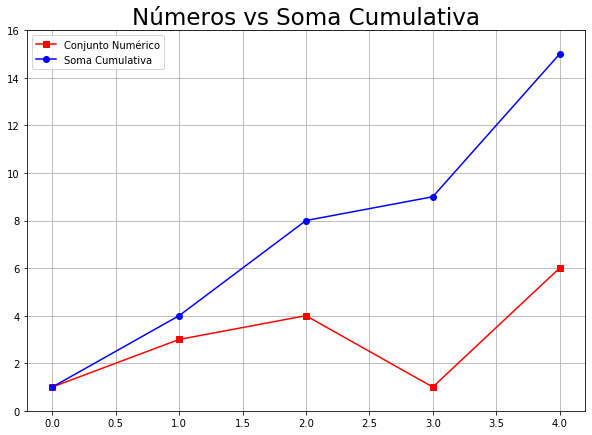

In [6]:
plt.figure(figsize=(10,7))
plt.grid()
plt.plot(x, 'rs-')
plt.plot(np.cumsum(x), 'bo-')
plt.ylim([0,16])
plt.legend(['Conjunto Numérico','Soma Cumulativa'])
plt.title('Números vs Soma Cumulativa',fontsize=23)
plt.show()

A seguir definimos uma lista de números **a**, obtemos dois somatórios e depois obtemos a razão entre ambos:

In [7]:
a = np.arange(1,6)

soma = np.sum(a)
soma_2 = np.sum(a**2)

resposta_1 = soma / soma_2
resposta_2 = 1 / soma

In [37]:
print(f'Opção 1: {resposta_1} | Opção 2: {resposta_2}')

Opção 1: 0.2727272727272727 | Opção 2: 0.06666666666666667


Usando a mesma lista **a**, obtemos dois produtos e depois obtemos a razão entre ambos:

In [8]:
prod = np.prod(a)
prod_2 = np.prod(a**2)

resposta_1 = prod / prod_2 
resposta_2 = 1 / prod

print(f'Opção 1: {resposta_1} | Opção 2: {resposta_2}')

Opção 1: 0.008333333333333333 | Opção 2: 0.008333333333333333


## Derivada Discreta

O termo derivada discreta é um termo vagamente usado para descrever um análogo de derivada para uma função cujo domínio é discreto. A ideia é tipicamente definir isso como um quociente de diferença em vez da noção contínua usual de derivada, que é definida como um limite de um quociente de diferença.

A seguir, definimos duas listas **x** e **q** e subtraímos o primeiro de **x** do segundo elemento de **x**:

In [9]:
x = [1,2]
q = [1,3,4,-4]

x[1] - x[0]

1

Da mesma forma, podemos usar a função **diff** de NumPy:

In [57]:
np.diff(x)

array([1])

In [56]:
np.diff(q)

array([ 2,  1, -8])

Também podemos computar a primeira e segunda derivada:

In [53]:
v = np.arange(0,11)

print(v)
print(np.diff(v))
print(np.diff(v,2))
print(np.diff(np.diff(v)))

[ 0  1  2  3  4  5  6  7  8  9 10]
[1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0]


Podemos plotar o gráfico de uma função e sua respectiva linha tangente em um determinado ponto:

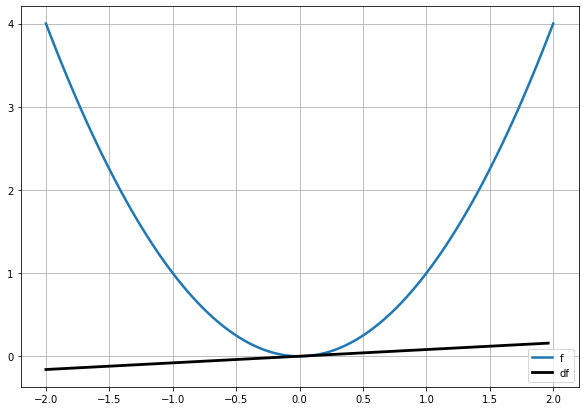

In [67]:
x = np.linspace(-2, 2, 101)
f = x**2
df = np.diff(f)

plt.figure(figsize=(10,7))
plt.grid()
plt.plot(x, f, linewidth=2.5, label='f')
plt.plot(x[0:-1], df, 'k', label='df', linewidth=2.8)
plt.legend()
plt.show()

## Raízes de Polinômios

Considere o polinômio: $3x^2 + 2x - 1$, vamos definir os seus coeficientes $(3, 2, -1)$ e calcular suas raízes:

In [10]:
coefs = [3,2,-1]
raizes = np.roots(coefs)

print(raizes)

[-1.          0.33333333]


Finalmente, podemos substituir as raízes em nosso polinômio:

In [75]:
x = sym.symbols('x')
polinomio = 3*x**2 + 2*x - 1

for i in raizes:
    display(Math(f'Em \\quad x={i}, \\quad {sym.latex(polinomio)} = {polinomio.subs(x,i)}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Também podemos descobrir o número de raízes de um polinômio baseado no seu grau:

In [11]:
for i in range(1,11):
    coefs = np.arange(1,i+1)
    print(f'Um polinômio de grau {len(coefs)-1} tem {len(np.roots(coefs))} raízes')

Um polinômio de grau 0 tem 0 raízes
Um polinômio de grau 1 tem 1 raízes
Um polinômio de grau 2 tem 2 raízes
Um polinômio de grau 3 tem 3 raízes
Um polinômio de grau 4 tem 4 raízes
Um polinômio de grau 5 tem 5 raízes
Um polinômio de grau 6 tem 6 raízes
Um polinômio de grau 7 tem 7 raízes
Um polinômio de grau 8 tem 8 raízes
Um polinômio de grau 9 tem 9 raízes


## A Equação Quadrática

Na álgebra, uma equação quadrática (do latim quadratus para "quadrado") é qualquer equação que pode ser reorganizada na forma padrão como:

$$ ax^2 + bx + c = 0 $$

Onde $x$ representa um desconhecido, e $a$, $b$ e $c$ representam números conhecidos, onde $a \neq 0$. Se $a = 0$, então a equação é linear, não quadrática, já que não há o termo $ax^2$. Os números $a$, $b$ e $c$ são os coeficientes da equação e podem ser distinguidos chamando-os, respectivamente, de coeficiente quadrático, coeficiente linear e termo constante ou livre.

Os valores de $x$ que satisfazem a equação são chamados de soluções da equação e raízes ou zeros da expressão em seu lado esquerdo. Uma equação quadrática tem no máximo duas soluções. Se não houver uma solução real, existem duas soluções complexas. Se houver apenas uma solução, diz-se que é uma raiz dupla. Uma equação quadrática sempre tem duas raízes, se raízes complexas forem incluídas e uma raiz dupla for contada para duas.

A fórmula quadrática para as raízes da equação quadrática geral:

$$ x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} $$

A seguir, vamos definir $a$, $b$ e $c$ e vamos substituir eles na equação quadrática positiva e negativa:

In [90]:
a = 2
b = 7
c = 5

quad_positivo = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)
quad_negativo = (-b - np.sqrt(b**2 - 4*a*c)) / (2*a)
print(quad_positivo, quad_negativo)

-1.0 -2.5


Também podemos definir uma função em que possamos especificar os números para $a$, $b$ e $c$:

In [12]:
def quad(a,b,c):
    # inicializar
    out = np.zeros(2)
    # computar
    out[0] = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)
    out[1] = (-b - np.sqrt(b**2 - 4*a*c)) / (2*a)
    
    return out

In [13]:
solucao = quad(2,7,5)
solucao

array([-1. , -2.5])

**Exercício**: Computar a equação quadrática para os diferentes valores de $a$, $b$ e $c$ e apresentar eles em um gráfico:

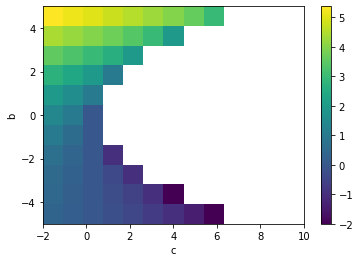

In [14]:
a = 1
b = range(-5,6)
c = range(-2,11)

M = np.zeros((len(b),len(c)))

for bi in range(0,len(b)):
    for ci in range(0,len(c)):
        M[bi,ci] = quad(a,b[bi],c[ci])[0]

plt.imshow(np.real(M), extent=[c[0],c[-1],b[0],b[-1]])
plt.xlabel('c')
plt.ylabel('b')
plt.colorbar()
plt.show()

## Números Complexos

Na matemática, um número complexo é um número que pode ser expresso na forma $a + bi$, onde $a$ e $b$ são números reais e $i$ é um símbolo denominado unidade imaginária e satisfaz a equação $i^2 = -1$. Como nenhum número real satisfaz essa equação, foi chamado de número imaginário por René Descartes.

A seguir apresentamos diferentes maneiras de representar o operador imaginário:

In [15]:
print(1j)
print(np.sqrt(-1,dtype='complex'))
print((-1)**(1/2))
print(sym.I)

1j
1j
(6.123233995736766e-17+1j)
I


Criando números complexos:

In [16]:
parte_real = 4
parte_imaginaria = -5

n_complex_1 = np.complex(parte_real, parte_imaginaria)
n_complex_2 = parte_real + 1j * parte_imaginaria

print(n_complex_1, n_complex_2)
print(type(n_complex_1), type(n_complex_2))

(4-5j) (4-5j)
<class 'complex'> <class 'complex'>


Subtração:

In [17]:
z1 = np.complex(4,5)
z2 = np.complex(3,2)
 
z1 - z2

(1+3j)

Extraindo a parte real de um número complexo:

In [18]:
np.real(z1)

4.0

Extraindo a parte imaginária de um número complexo:

In [19]:
np.imag(z1)

5.0

A seguir, temos duas maneiras de fazer a soma dos números complexos:
    
- Somando as partes separadas
- Somando os números diretamente

In [20]:
w = np.complex(2,4)
z = np.complex(5,6)

soma_real = np.real(w) + np.real(z)
soma_imag = np.imag(w) + np.imag(z)

soma_separada = np.complex(soma_real, soma_imag)
soma_direta = w + z

print(soma_separada, soma_direta)
print(soma_separada == soma_direta)

(7+10j) (7+10j)
True


Multiplicação entre dois números complexos:

In [21]:
z1 = np.complex(4,5)
z2 = np.complex(6,-2)

w = np.real(z1) * np.real(z2) + np.real(z1) * np.imag(z2)*1j + np.imag(z1)*1j*np.real(z2) + np.imag(z1)*1j*np.imag(z2)*1j
print(w)
print(z1*z2)

(34+22j)
(34+22j)


Um conjugado complexo é formado pela mudança do sinal entre dois termos em um número complexo.

Podemos obtê-lo com o método **conj** do NumPy:

In [22]:
np.conj(z1)

(4-5j)

In [23]:
np.conj(z2)

(6+2j)

Também podemos usar SymPy para obter o conjugado:

In [24]:
a, b = sym.symbols('a b', real=True)
z = a + b * sym.I
sym.conjugate(z)

a - I*b

In [25]:
z * sym.conjugate(z)

(a - I*b)*(a + I*b)

Observe que ao expandirmos a multiplicação entre um número complexo e seu conjugado, a unidade imaginária desaparece:

In [134]:
display(Math('z\\times z^* = %s' %sym.latex(sym.expand(z * sym.conjugate(z)))))

<IPython.core.display.Math object>

Podemos dividir um número complexo por um valor:

In [137]:
z = np.complex(4,2)

display(Math('\\frac{%s}{2} = %s' %(z,sym.latex(sym.sympify(z/2)))))

<IPython.core.display.Math object>

Os números complexos possuem a seguinte identidade:

In [26]:
z1 = np.complex(4,2)
z2 = np.complex(2,-3)

display(
    Math('\\frac{%s}{%s} = \\frac{%s \\times %s}{%s \\times %s} = %s' 
             %(z1, z2, z1, np.conj(z2), z2, np.conj(z2), z1/z2)
        )
)

<IPython.core.display.Math object>

Também é interessante visualizarmos os números complexos em gráficos:

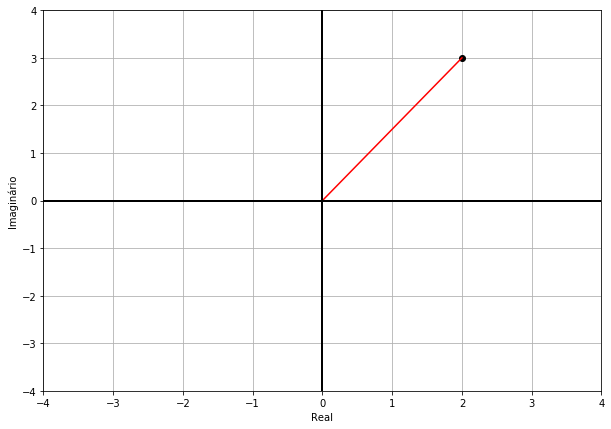

In [27]:
z = np.complex(2,3)

plt.figure(figsize=(10,7))
plt.plot(np.real(z), np.imag(z), 'ko')
plt.plot([0,np.real(z)],[0,np.imag(z)],'r')
plt.plot([-4,4],[0,0],'k',linewidth=2)
plt.plot([0,0],[-4,4],'k',linewidth=2)
plt.xlabel('Real')
plt.ylabel('Imaginário')
plt.grid()
plt.axis([-4,4,-4,4])
plt.show()

Para ter uma melhor intuição a respeito da soma dos números complexos, podemos plotá-la em um gráfico:

(-4+2j)


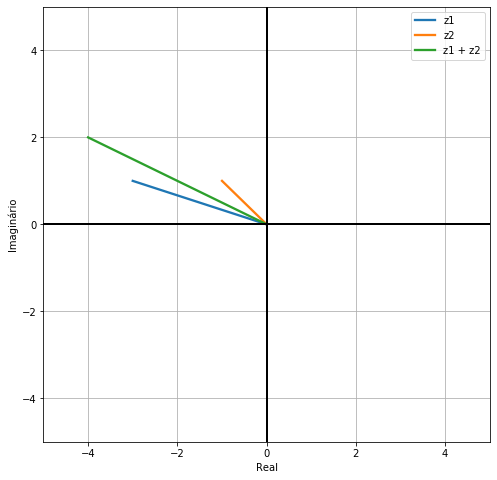

In [28]:
z1 = np.complex(-3,1)
z2 = np.complex(-1,1)

soma = z1 + z2

print(soma)

plt.figure(figsize=(8,8))
plt.plot([0,np.real(z1)],[0,np.imag(z1)],label='z1',linewidth=2.3)
plt.plot([0,np.real(z2)],[0,np.imag(z2)],label='z2',linewidth=2.3)
plt.plot([0,np.real(soma)],[0,np.imag(soma)],label='z1 + z2',linewidth=2.3)
plt.plot([-5,5],[0,0],'k',linewidth=2)
plt.plot([0,0],[-5,5],'k',linewidth=2)
plt.xlabel('Real')
plt.ylabel('Imaginário')
plt.legend()
plt.grid()
plt.axis([-5,5,-5,5])
plt.show()

Podemos fazer o mesmo com a multiplicação:

(2-4j)


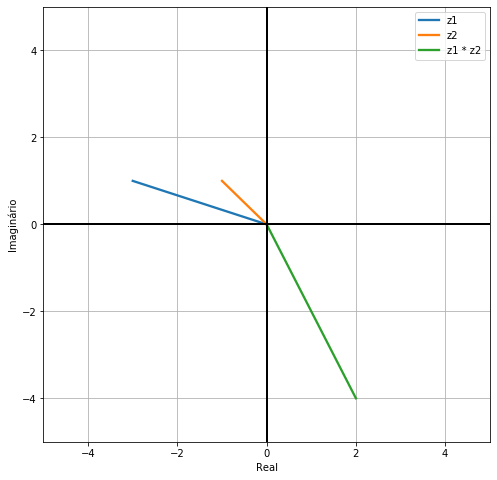

In [29]:
z1 = np.complex(-3,1)
z2 = np.complex(-1,1)

multiplicacao = z1 * z2

print(multiplicacao)

plt.figure(figsize=(8,8))
plt.plot([0,np.real(z1)],[0,np.imag(z1)],label='z1',linewidth=2.3)
plt.plot([0,np.real(z2)],[0,np.imag(z2)],label='z2',linewidth=2.3)
plt.plot([0,np.real(multiplicacao)],[0,np.imag(multiplicacao)],label='z1 * z2',linewidth=2.3)
plt.plot([-5,5],[0,0],'k',linewidth=2)
plt.plot([0,0],[-5,5],'k',linewidth=2)
plt.xlabel('Real')
plt.ylabel('Imaginário')
plt.legend()
plt.grid()
plt.axis([-5,5,-5,5])
plt.show()

## O Círculo Unitário

O círculo unitário é um círculo de raio unitário, ou seja, um raio de **1**. Freqüentemente, especialmente em trigonometria, o círculo unitário é o círculo de raio 1 centrado na origem **(0, 0)** no sistema de coordenadas cartesianas no plano euclidiano.

A seguir, vamos plotar o círculo unitário:

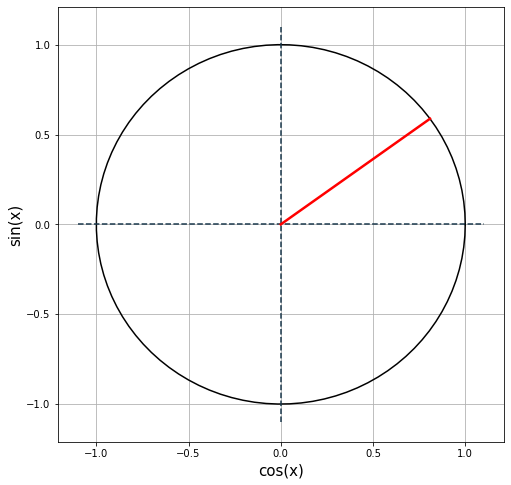

In [30]:
x = np.linspace(0, 2*np.pi, 100)

plt.figure(figsize=(8,8))
plt.plot(np.cos(x), np.sin(x), 'k')
plt.plot([-1.1,1.1],[0,0],'--',color='#18364a')
plt.plot([0,0],[-1.1,1.1],'--',color='#18364a')

angulo = np.pi/5
plt.plot([0,np.cos(angulo)],[0,np.sin(angulo)],'r',linewidth=2.5)

plt.grid()
plt.xlabel('cos(x)', fontsize=15)
plt.ylabel('sin(x)', fontsize=15)
plt.show()

Seguindo essa lógica, podemos criar efeitos artísticos:

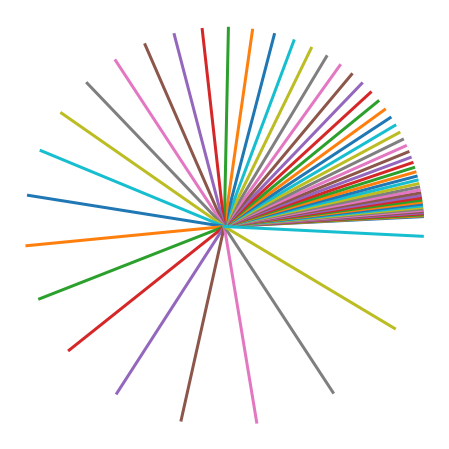

In [31]:
x = np.linspace(-3, 1.83, 60)
k = np.exp(x)

plt.figure(figsize=(8,8))

for i in k:
    plt.plot([0,np.cos(i)],[0,np.sin(i)], linewidth=3)

plt.axis('square')
plt.axis('off')
plt.show()

## Exponencial Natural e Logaritmo

A função exponencial (natural) $f(x) = e^x$ é a única função que é igual à sua própria derivada, com o valor inicial $f(0) = 1$ (e, portanto, pode-se definir e como $f(1)$).

O logaritmo natural, ou logaritmo para a base $e$, é a função inversa da função exponencial natural.

A seguir, vamos plotar o gráfico de ambos:

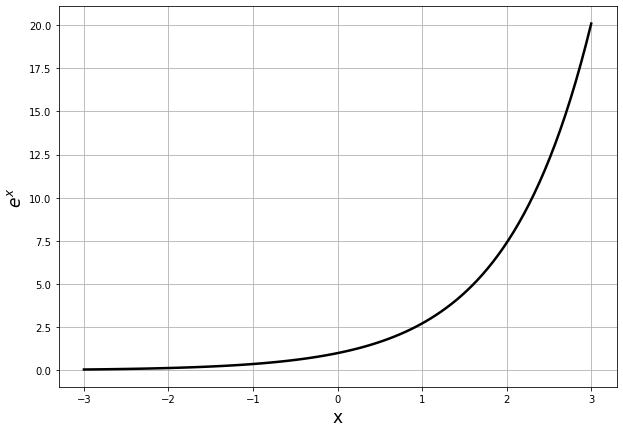

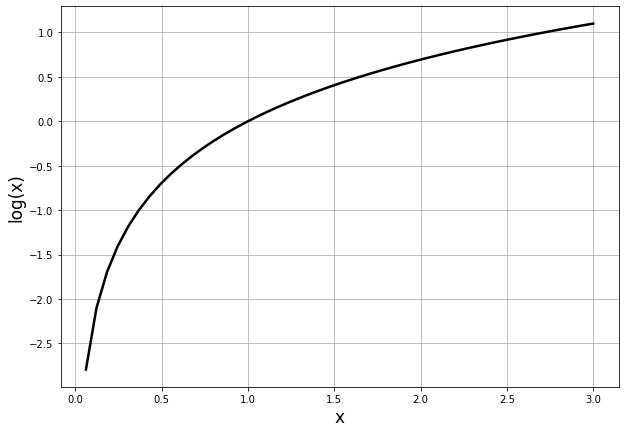

In [32]:
x = np.linspace(-3,3,99)

# Gráfico da função exponencial
plt.figure(figsize=(10,7))
plt.plot(x, np.exp(x), linewidth=2.5, color='k')
plt.grid()
plt.xlabel('x', fontsize=17)
plt.ylabel('$e^x$', fontsize=17)
plt.show()

# Gráfico da função logarítmica
plt.figure(figsize=(10,7))
plt.plot(x, np.log(x), linewidth=2.5, color='k')
plt.grid()
plt.xlabel('x', fontsize=17)
plt.ylabel('log(x)', fontsize=17)
plt.show()

O gráfico a seguir nos confirma que o logaritmo é a função inversa da exponenciação:

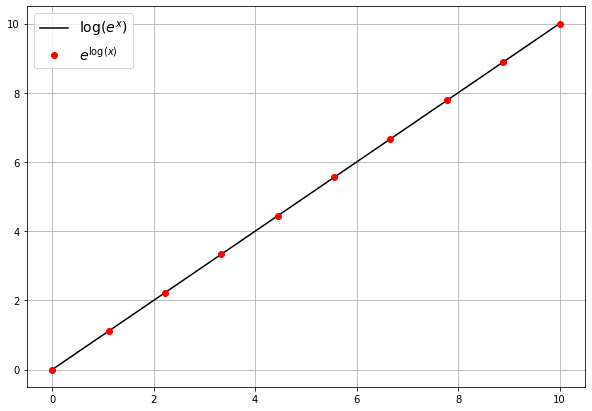

In [33]:
x = np.linspace(0.0001, 10, 10)

y1 = np.log(np.exp(x))
y2 = np.exp(np.log(x))

plt.figure(figsize=(10,7))
plt.plot(x, y1, 'k', label='$\\log(e^x)$')
plt.plot(x, y2, 'ro', label='$e^{\\log(x)}$')
plt.legend(fontsize=14)
plt.grid()
plt.show()

## Raízes Complexas da Unidade

Na matemática, uma raiz de unidade, ocasionalmente chamada de número de Moivre, é qualquer número complexo que produza **1** quando elevado a alguma potência inteira positiva **n**.

$$ z^n = 1, \quad z \in \mathbb{C} $$

$$ z = e^{2 \pi i \frac{k}{n}} $$

$$ k = 0, 1, ..., n - 1 $$

As raízes da unidade são usadas em muitos ramos da matemática e são especialmente importantes na teoria dos números, na teoria dos caracteres de grupo e na transformada discreta de Fourier.

Considere $n = 4$, calculamos as raízes complexas da unidade:

In [34]:
n = 4

for k in range(n):
    z = sym.exp(2 * sym.pi * sym.I * k/n)
    display(Math('(%s)^{%s} \\Rightarrow %s' %(sym.latex(z), n, sym.latex(z**n))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

A seguir, podemos plotar $n$ raízes complexas da unidade:

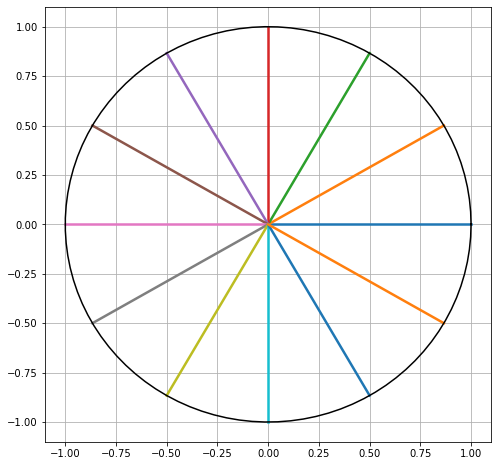

In [35]:
n = 12

plt.figure(figsize=(8,8))
plt.grid()

for k in range(n):
    z = np.exp(2 * np.pi * 1j * k/n)
    plt.plot([0,np.real(z)],[0,np.imag(z)], linewidth=2.5)

x = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(x), np.sin(x), color='black')
plt.show()

Podemos alterar as raízes ao multiplicar a equação por $k$:

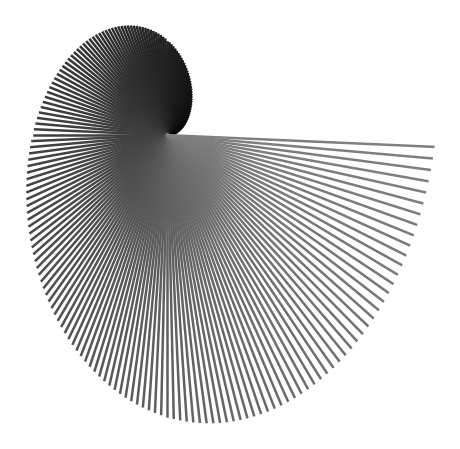

In [37]:
n = 200

cor = np.linspace(0, 0.5, n)

plt.figure(figsize=(8,8))

for k in range(n):
    z = k * np.exp(2 * np.pi * 1j * k/n)
    plt.plot([0,np.real(z)],[0,np.imag(z)], linewidth=2.5, color=[cor[k],cor[k],cor[k]])

plt.axis('off')
plt.show()

## Números com Espaçamento Logarítmico e Linear

Considere as seguintes sequência numéricas, cada uma com um espaçamento diferente:

- Linear = 1, 2, 3, 4, 5
- Log = 1, 1.5, 2.2, 3.3, 5

Gerando números separados linearmente:

In [38]:
x = np.linspace(1, 2, 10)
x

array([1.        , 1.11111111, 1.22222222, 1.33333333, 1.44444444,
       1.55555556, 1.66666667, 1.77777778, 1.88888889, 2.        ])

Gerando números separados logaritmicamente:

In [39]:
a = np.log10(1)
b = np.log10(2)
y = np.logspace(a, b, 10)
y

array([1.        , 1.08005974, 1.16652904, 1.25992105, 1.36079   ,
       1.46973449, 1.58740105, 1.71448797, 1.85174942, 2.        ])

A seguir, mostramos que a escala linear aproxima a escala logarítmica conforme os limites se aproximam:

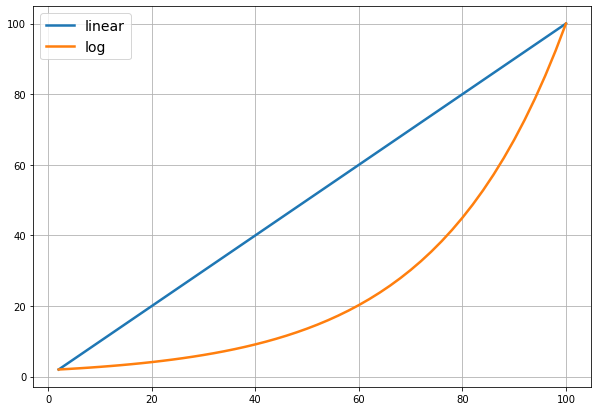

In [40]:
# Limites
a = 2
b = 100
n = 50

plt.figure(figsize=(10,7))
plt.grid()

# Gerados dados
linear = np.linspace(a, b, n)
log = np.logspace(np.log10(a), np.log10(b), n)

plt.plot(linear, linear, label='linear', linewidth=2.5)
plt.plot(linear, log, label='log', linewidth=2.5)
plt.legend(fontsize=14)
plt.show()

A seguir, mostramos que a escala linear aproxima a escala logarítmica conforme os limites se aproximam:

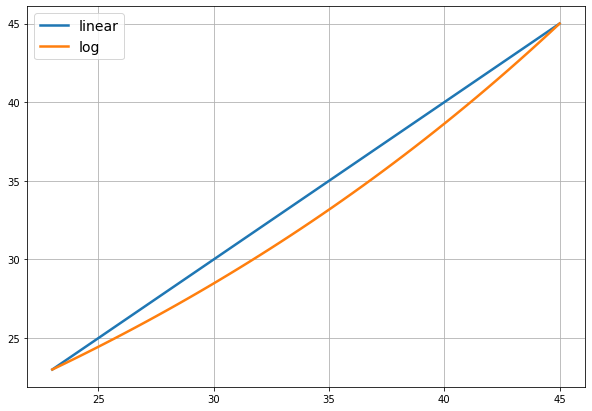

In [41]:
# Limites
a = 23
b = 45
n = 50

plt.figure(figsize=(10,7))
plt.grid()

# Gerados dados
linear = np.linspace(a, b, n)
log = np.logspace(np.log10(a), np.log10(b), n)

plt.plot(linear, linear, label='linear', linewidth=2.5)
plt.plot(linear, log, label='log', linewidth=2.5)
plt.legend(fontsize=14)
plt.show()

## Sequências Aritméticas e Geométricas

**Sequência**: Uma lista ordenada de números.

**Aritmética**: $ a_n = a_0 + d(n - 1) $

**Geométrica**: $ g_n = g_o r ^{(n - 1)} $

#### Criando uma Sequência Aritmética

Definimos os parâmetros $a$ e $d$ e o número máximo de números:

In [42]:
a = 2
d = 3 
max_n = 12

seq_aritmetica = a + d * np.arange(0, max_n)
seq_aritmetica

array([ 2,  5,  8, 11, 14, 17, 20, 23, 26, 29, 32, 35])

#### Criando uma Sequência Geométrica

Definimos os parâmetros $a$ e $r$:

In [43]:
a = 2
r = 2

seq_geometrica = a * r**np.arange(0, max_n)
seq_geometrica

array([   2,    4,    8,   16,   32,   64,  128,  256,  512, 1024, 2048,
       4096])

Plotamos ambas as sequência para comparar o crescimento:

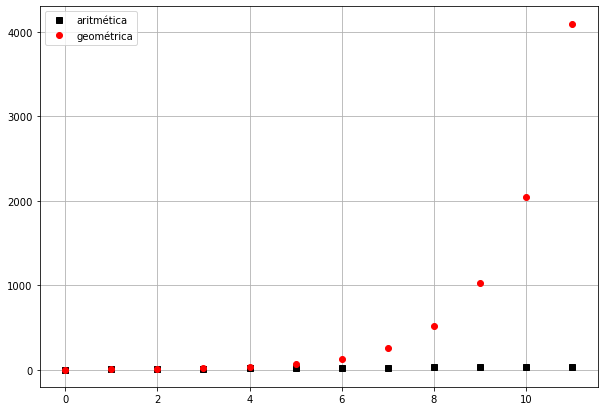

In [44]:
plt.figure(figsize=(10,7))
plt.grid()
plt.plot(seq_aritmetica, 'ks', label='aritmética')
plt.plot(seq_geometrica, 'ro', label='geométrica')
plt.legend()
plt.show()

#### Computando o Elemento na Posição n

A seguir vamos ver como podemos computar o valor de um elemento em uma determinada posição **nth**:

In [317]:
# Parâmetros
a = 2
d = 3 
max_n = 10
nth = 6

# Computar as sequências
seq_aritmetica = a + d * np.arange(0, max_n)
seq_geometrica = a * d**np.arange(0, max_n)

print(seq_aritmetica)
print(seq_geometrica)

# Computação direta
ari_direta = a + d*(nth-1)
geo_direta = a * d**(nth-1)

print(ari_direta, seq_aritmetica[nth-1])
print(geo_direta, seq_geometrica[nth-1])

[ 2  5  8 11 14 17 20 23 26 29]
[    2     6    18    54   162   486  1458  4374 13122 39366]
17 17
486 486


## Ordens de Magnitude e Notação Científica

A notação científica é uma forma de expressar números muito grandes ou muito pequenos para serem convenientemente escritos na forma decimal:

$$ 10^{-2} = 0.01 $$
$$ 10^{-1} = 0.1 $$
$$ 10^0 = 1 $$
$$ 10^1 = 10 $$
$$ 10^2 = 100 $$
$$ 10^3 = 1000 $$
$$ 10^4 = 10.000 $$

Por exemplo:

* 10.021 possuí 4 ordens de magnitude.
* 2.119 possuí 3 ordens de magnitude.
* 0.034 possuí -2 ordens de magnitude.

Notação Científica:

In [45]:
x = 3984573945

f'{x:,e}'

'3.984574e+09'

Formatação com vírgula:

In [46]:
f'{x:,d}'

'3,984,573,945'

Utilizando quatro casas decimais:

In [47]:
s = '%.4e' %x
s

'3.9846e+09'

Imprimindo a ordem de magnitude mais próxima de um determinado número:

In [48]:
numero = 9999

# Obtendo a ordem de magnitude
ordem_magnitude = int(np.floor(np.log10(abs(numero))))

# Notação científica
numero_string = f'{x:,e}'
indice_ponto = numero_string.find('.')
notacao_cientifica = numero_string[:indice_ponto]

display(
    Math(
        '%s \\text{ possui } %s \\text{ ordens de magnitude, } \\approx %s \\times 10^{%g}'
         %(numero, ordem_magnitude, notacao_cientifica, ordem_magnitude)
        )
)

<IPython.core.display.Math object>

## Identificando o Ponto Máximo e Mínimo de uma Função

Na análise matemática, os máximos e mínimos de uma função, conhecidos coletivamente como extremos, são o maior e o menor valor da função, seja dentro de um determinado intervalo ou em todo o domínio.

Vamos definir uma lista e calcular o seu valor máximo e o índice do valor máximo:

In [51]:
lista = [-4,5.5,1,2]

valor_max = np.max(lista)
indice_valor_max = np.argmax(lista)

In [52]:
valor_max

5.5

In [53]:
lista[indice_valor_max]

5.5

A seguir, vamos calcular o valor **máximo** de uma função e plotá-lo juntamente com ela:

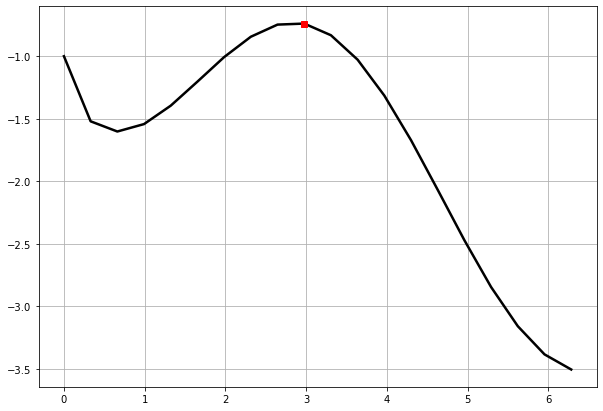

In [55]:
x = np.linspace(0, 2*np.pi, 20)

plt.figure(figsize=(10,7))
plt.grid()

fx = -(np.cos(x) + np.sqrt(x))
fmax = np.max(fx)
fmax_indice = np.argmax(fx)

plt.plot(x, fx, 'k', linewidth=2.5)
plt.plot(x[fmax_indice], fmax, 'rs')
plt.show()

Também vamos calcular o valor **mínimo** de uma função e plotá-lo juntamente com ela:

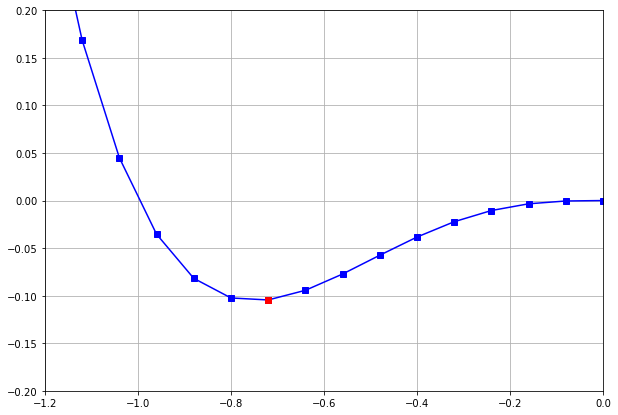

In [56]:
x = np.linspace(-2, 2, 51)

plt.figure(figsize=(10,7))
plt.grid()

fx = x**3 + x**4

fmin_indice = np.argmin(fx)

plt.plot(x, fx, 'bs-')
plt.plot(x[fmin_indice], fx[fmin_indice], 'rs')
plt.xlim([-1.2,0])
plt.ylim([-0.2,0.2])
plt.show()

Também podemos obter os picos (máximos locais) de uma determinada função:

[ 16  52  88 123 158 194]
[ 2.84521599  9.24695196 15.64868793 21.87259791 28.09650788 34.49824386]


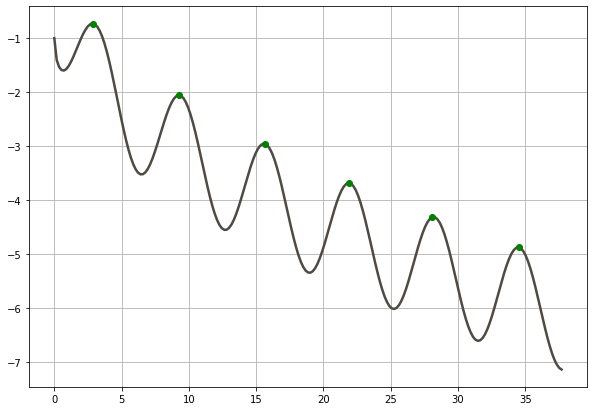

In [57]:
x = np.linspace(0, 12*np.pi, 213)

plt.figure(figsize=(10,7))
plt.grid()

fx = -np.cos(x) - np.sqrt(x)
picos = find_peaks(fx) # Retorna um array com os índices dos valores máximos
print(picos[0])
print(x[picos[0]])

plt.plot(x, fx, linewidth=2.5, c='#4f4a42')
plt.plot(x[picos[0]], fx[picos[0]], 'go')
plt.show()

## Funções Pares e Ímpares

Na matemática, funções pares e funções ímpares são funções que satisfazem relações de simetria particulares, com respeito a tomar inversos aditivos. Por exemplo:

$$ f(x) \text{ é par se } f(-x) = f(x) $$

$$ f(x) \text{ é ímpar se } f(-x) = -f(x) $$

A seguir vamos definir uma função par e uma função par negativa:

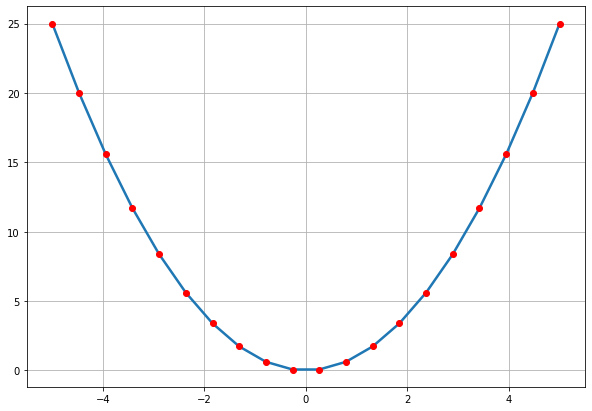

In [58]:
x = np.linspace(-5, 5, 20)

plt.figure(figsize=(10,7))
plt.grid()

f_par = x**2
f_par_negativa = (-x)**2

plt.plot(x, f_par, linewidth=2.5)
plt.plot(x, f_par_negativa, 'ro')
plt.show()

Também vamos definir uma função ímpar e duas funções ímpares negativas:

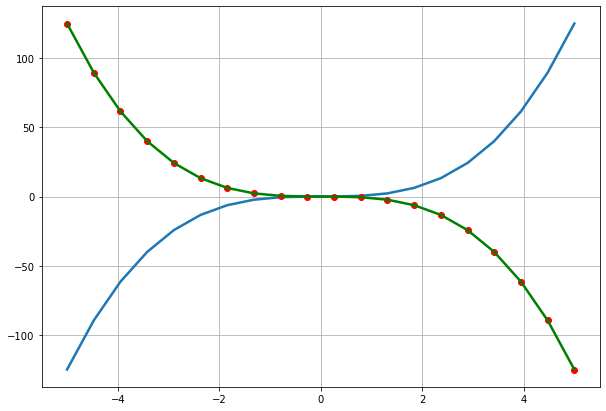

In [59]:
plt.figure(figsize=(10,7))
plt.grid()

f_impar = x**3
f_impar_negativa = (-x)**3
f_negativa_impar = -f_impar

plt.plot(x, f_impar, linewidth=2.5)
plt.plot(x, f_impar_negativa, 'ro')
plt.plot(x, f_negativa_impar, 'g', linewidth=2.5)
plt.show()

Analisando a função cosseno:

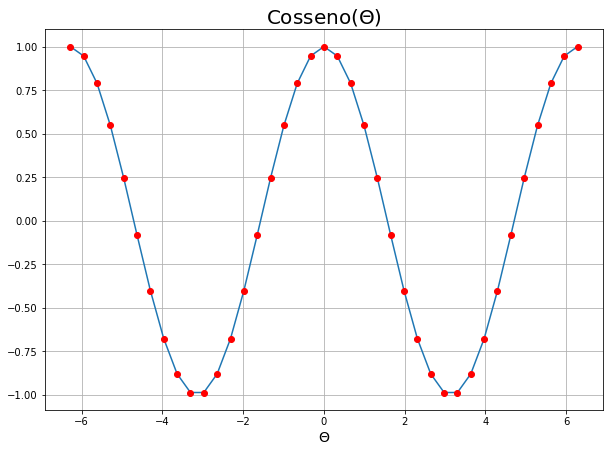

In [60]:
theta = np.linspace(-2*np.pi, 2*np.pi, 39)

plt.figure(figsize=(10,7))
plt.grid()

# Definindo a função cosseno
f_cos = np.cos(theta)
f_cos_neg = np.cos(-theta)

# Observando que a função cosseno é uma função par
plt.plot(theta, f_cos)
plt.plot(theta, f_cos_neg, 'ro')
plt.title('Cosseno($\\Theta$)', fontsize=20)
plt.xlabel('$\\Theta$', fontsize=14)
plt.show()

Analisando a função seno:

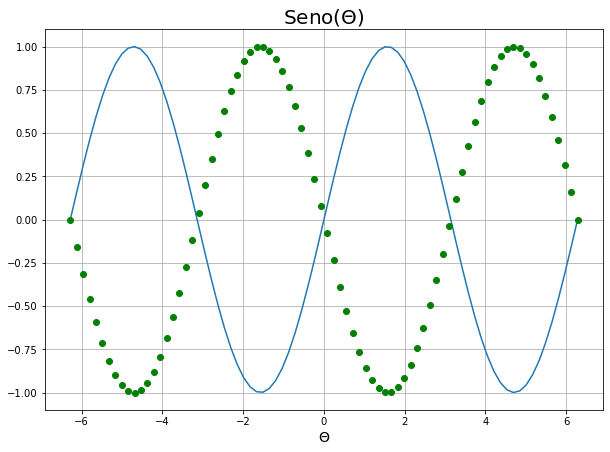

In [61]:
theta = np.linspace(-2*np.pi, 2*np.pi, 80)

plt.figure(figsize=(10,7))
plt.grid()

# Definindo a função seno
f_sin = np.sin(theta)
f_sin_neg = np.sin(-theta)

# Observando que a função seno é uma função ímpar
plt.plot(theta, f_sin)
plt.plot(theta, f_sin_neg, 'go')
plt.title('Seno($\\Theta$)', fontsize=20)
plt.xlabel('$\\Theta$', fontsize=14)
plt.show()

## Revisão

Para concluir, vamos fazer uma revisão dos conceitos aprendidos neste notebook.

Criando uma lista:

In [62]:
lst = [1,3,4,1,6]

print(lst)

[1, 3, 4, 1, 6]


Adicionando todos os números da lista **lst**:

In [63]:
np.sum(lst)

15

Plotando a soma cumulativa de uma lista de números:

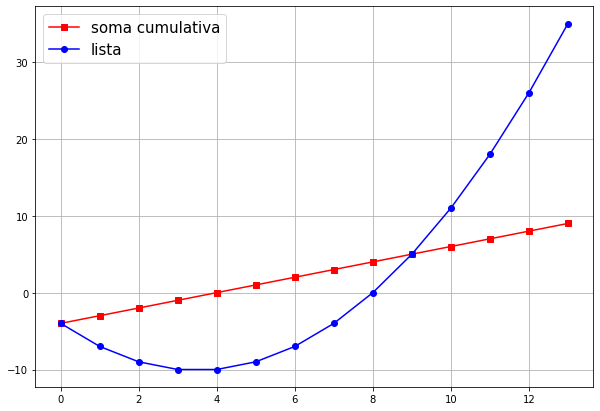

In [65]:
l = np.arange(-4,10)

plt.figure(figsize=(10,7))
plt.grid()
plt.plot(l, 'rs-')
plt.plot(np.cumsum(l), 'bo-')
plt.legend({'lista','soma cumulativa'}, fontsize=15)
plt.show()

Considere a equação:

$$4 - 2x + 5x^3$$
$$4 -2x + 0x^2 + 5x^3$$

Observe que $0$ é o termo implícito.

Vamos então definir os coeficientes:

In [66]:
coefs = [5, 0, -2, 4]

x = sym.symbols('x')

p = sym.Poly(coefs, x)
display(Math(sym.latex(p)))

<IPython.core.display.Math object>

Definindo um número complexo simbólico:

In [67]:
a, b = sym.symbols('a b', real=True)
z = a + b * sym.I

display(Math('z \\times z^* = %s' %sym.latex(sym.expand(z*sym.conjugate(z)))))

<IPython.core.display.Math object>

**Objetivo**: Plotar o ponto na função mais próximo de $f(x) = 0.5$.

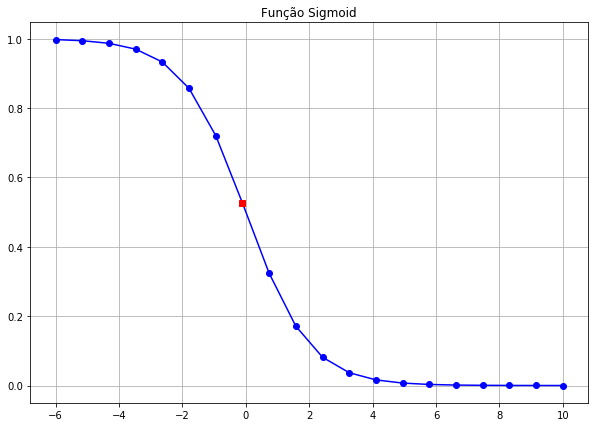

In [68]:
# Gerando dados x
x = np.linspace(-6, 10, 20)

# Definindo a função f(x)
fx = 1/(1 + np.exp(x))

# Máximo da função
f_max_indice = np.argmin(abs(fx - 0.5))

# Desenhando a função
plt.figure(figsize=(10,7))
plt.grid()
plt.plot(x, fx, 'bo-')
plt.plot(x[f_max_indice], fx[f_max_indice], 'rs')
plt.title('Função Sigmoid')
plt.show()

**Objetivo**: Buscar os mínimos local de uma função.

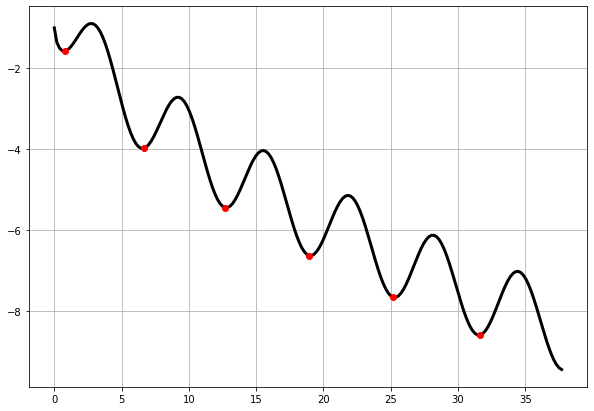

In [69]:
# Gerando dados x
x = np.linspace(0, 12*np.pi, 200)

# A função f(x)
fx = -(np.cos(x) + x**(1/1.7))

# Encontrando os picos
picos = find_peaks(-fx)

# Desenhando a função
plt.figure(figsize=(10,7))
plt.grid()
plt.plot(x, fx, linewidth=3, color='k')
plt.plot(x[picos[0]], fx[picos[0]], 'ro')
plt.show()